### WHAT LEARNT FROM THIRD CODE:

-   Model is able to learn and get the accuracy more than 99.4 with less than 20k parameters.

### MY STRATEGY AND IMPROVEMENTS:

-  Reducing parameters less than 15k.
-  Changing number of kernels.
-  Changing batch size  = 128 

### Target 

Reach validation accuracy more than **99.4 with less than 15k parameters** , Should not use any learning rate schedular as it is proportionate to the number of epochs, i am not going to use it.

    -  ACHIEVED 99.430 in 67th EPOCH.

#### TOOLS USED AND OBSERVATIONS 

-   I have just used the same pattern from THIRD code but decreased the number of kernels.
-  Used Batch Normalization, Used Dropout, **No Learning rate schedular.**
-  I have used only 13,744 parameters.
-  Sticked to batch size = 128 and the Training accuracies are clearly increasing from 89.9 to 99.16.
-   I have ran for 50 epochs and the validation accuracy reached the **MAXIMUM OF 99.430 in 67th epoch**

In [0]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


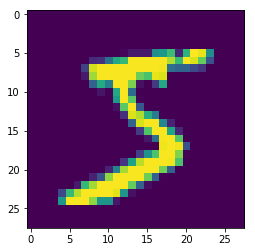

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # Receptive field : 3x3 , Resolution output : 26x26x16
model.add(BatchNormalization(name='norm_1'))
model.add(Convolution2D(10, 1,1, activation='relu')) # Receptive field : 3x3 , Resolution output : 26x26x10
model.add(Dropout(0.20))

model.add(Convolution2D(16, 3, 3, activation='relu')) # Receptive field : 5x5 , Resolution output : 24x24x16
model.add(BatchNormalization(name='norm_2'))
model.add(Convolution2D(10, 1,1, activation='relu')) # Receptive field : 5x5 , Resolution output : 24x24x10
model.add(Dropout(0.20))

model.add(Convolution2D(32, 3, 3, activation='relu')) # Receptive field : 7x7 , Resolution output : 22x22x32
model.add(BatchNormalization(name='norm_3'))
model.add(Convolution2D(10, 1,1, activation='relu')) # Receptive field : 7x7 , Resolution output : 22x22x10
model.add(Dropout(0.20))

model.add(MaxPooling2D(pool_size=(2,2))) # Receptive field : 14x14 , Resolution output : 11x11x10
model.add(Dropout(0.20))

model.add(Convolution2D(16, 3, 3, activation='relu')) # Receptive field : 16x16 , Resolution output : 9x9x16
model.add(BatchNormalization(name='norm_4'))
model.add(Convolution2D(10, 1,1, activation='relu')) # Receptive field : 16x16 , Resolution output : 9x9x10
model.add(Dropout(0.20))

model.add(Convolution2D(16, 3, 3, activation='relu')) # Receptive field : 18x18 , Resolution output : 7x7x16
model.add(BatchNormalization(name='norm_6'))
model.add(Convolution2D(10, 1,1, activation='relu')) # Receptive field : 18x18 , Resolution output : 7x7x10
model.add(Dropout(0.20))

model.add(Convolution2D(10, 7, 7)) # Resolution output : 1x1x10
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/py

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 26, 26, 10)        170       
_________________________________________________________________
dropout_14 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
norm_2 (BatchNormalization)  (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 10)        170       
__________

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!wget https://raw.githubusercontent.com/bckenstler/CLR/master/clr_callback.py
from clr_callback import *

--2019-05-18 19:00:03--  https://raw.githubusercontent.com/bckenstler/CLR/master/clr_callback.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5326 (5.2K) [text/plain]
Saving to: ‘clr_callback.py.7’

clr_callback.py.7   100%[===================>]   5.20K  --.-KB/s    in 0s      

2019-05-18 19:00:03 (61.3 MB/s) - ‘clr_callback.py.7’ saved [5326/5326]



In [0]:
filepath="/content/gdrive/My Drive/Raajesh-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.3075 - acc: 0.8993 - val_loss: 0.0635 - val_acc: 0.9795

Epoch 00001: val_acc improved from -inf to 0.97950, saving model to /content/gdrive/My Drive/Raajesh-01-0.98.hdf5
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0947 - acc: 0.9702 - val_loss: 0.0527 - val_acc: 0.9821

Epoch 00002: val_acc improved from 0.97950 to 0.98210, saving model to /content/gdrive/My Drive/Raajesh-02-0.98.hdf5
Epoch 3/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0739 - acc: 0.9765 - val_loss: 0.0447 - val_acc: 0.9869

Epoch 00003: val_acc improved from 0.98210 to 0.98690, saving model to /content/gdrive/My Drive/Raajesh-03-0.99.hdf5
Epoch 4/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0686 - acc: 0.9782 - val_loss: 0.0501 - val_acc: 0.9846

Epoch 00004: val_acc did not improve from 0.98

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.3075 - acc: 0.8993 - val_loss: 0.0635 - val_acc: 0.9795

Epoch 00001: val_acc improved from -inf to 0.97950, saving model to /content/gdrive/My Drive/Raajesh-01-0.98.hdf5
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0947 - acc: 0.9702 - val_loss: 0.0527 - val_acc: 0.9821

Epoch 00002: val_acc improved from 0.97950 to 0.98210, saving model to /content/gdrive/My Drive/Raajesh-02-0.98.hdf5
Epoch 3/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0739 - acc: 0.9765 - val_loss: 0.0447 - val_acc: 0.9869

Epoch 00003: val_acc improved from 0.98210 to 0.98690, saving model to /content/gdrive/My Drive/Raajesh-03-0.99.hdf5
Epoch 4/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0686 - acc: 0.9782 - val_loss: 0.0501 - val_acc: 0.9846

Epoch 00004: val_acc did not improve from 0.98690
Epoch 5/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.0603 - acc: 0.9809 - val_loss: 0.0496 - val_acc: 0.9852

Epoch 00005: val_acc did not improve from 0.98690
Epoch 6/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0585 - acc: 0.9818 - val_loss: 0.0413 - val_acc: 0.9873

Epoch 00006: val_acc improved from 0.98690 to 0.98730, saving model to /content/gdrive/My Drive/Raajesh-06-0.99.hdf5
Epoch 7/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0538 - acc: 0.9827 - val_loss: 0.0282 - val_acc: 0.9903

Epoch 00007: val_acc improved from 0.98730 to 0.99030, saving model to /content/gdrive/My Drive/Raajesh-07-0.99.hdf5
Epoch 8/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0530 - acc: 0.9829 - val_loss: 0.0302 - val_acc: 0.9903

Epoch 00008: val_acc did not improve from 0.99030
Epoch 9/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0488 - acc: 0.9844 - val_loss: 0.0366 - val_acc: 0.9894

Epoch 00009: val_acc did not improve from 0.99030
Epoch 10/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0482 - acc: 0.9842 - val_loss: 0.0417 - val_acc: 0.9858

Epoch 00010: val_acc did not improve from 0.99030
Epoch 11/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0491 - acc: 0.9849 - val_loss: 0.0566 - val_acc: 0.9825

Epoch 00011: val_acc did not improve from 0.99030
Epoch 12/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0457 - acc: 0.9854 - val_loss: 0.0376 - val_acc: 0.9891

Epoch 00012: val_acc did not improve from 0.99030
Epoch 13/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0442 - acc: 0.9860 - val_loss: 0.0250 - val_acc: 0.9918

Epoch 00013: val_acc improved from 0.99030 to 0.99180, saving model to /content/gdrive/My Drive/Raajesh-13-0.99.hdf5
Epoch 14/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0429 - acc: 0.9864 - val_loss: 0.0348 - val_acc: 0.9893

Epoch 00014: val_acc did not improve from 0.99180
Epoch 15/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0430 - acc: 0.9861 - val_loss: 0.0318 - val_acc: 0.9904

Epoch 00015: val_acc did not improve from 0.99180
Epoch 16/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0424 - acc: 0.9868 - val_loss: 0.0303 - val_acc: 0.9909

Epoch 00016: val_acc did not improve from 0.99180
Epoch 17/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0417 - acc: 0.9865 - val_loss: 0.0241 - val_acc: 0.9926

Epoch 00017: val_acc improved from 0.99180 to 0.99260, saving model to /content/gdrive/My Drive/Raajesh-17-0.99.hdf5
Epoch 18/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0400 - acc: 0.9874 - val_loss: 0.0253 - val_acc: 0.9914

Epoch 00018: val_acc did not improve from 0.99260
Epoch 19/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0396 - acc: 0.9876 - val_loss: 0.0716 - val_acc: 0.9784

Epoch 00019: val_acc did not improve from 0.99260
Epoch 20/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0378 - acc: 0.9878 - val_loss: 0.0261 - val_acc: 0.9903

Epoch 00020: val_acc did not improve from 0.99260
<keras.callbacks.History at 0x7f6ac4f21630>

In [0]:
model.load_weights('/content/gdrive/My Drive/Raajesh-17-0.99.hdf5')

In [0]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1,validation_data=(X_test, Y_test),callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0391 - acc: 0.9875 - val_loss: 0.0282 - val_acc: 0.9913

Epoch 00001: val_acc did not improve from 0.99260
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0394 - acc: 0.9873 - val_loss: 0.0435 - val_acc: 0.9871

Epoch 00002: val_acc did not improve from 0.99260
Epoch 3/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0398 - acc: 0.9871 - val_loss: 0.0248 - val_acc: 0.9916

Epoch 00003: val_acc did not improve from 0.99260
Epoch 4/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0379 - acc: 0.9883 - val_loss: 0.0279 - val_acc: 0.9912

Epoch 00004: val_acc did not improve from 0.99260
Epoch 5/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0370 - acc: 0.9882 - val_loss: 0.0246 - val_acc: 0.9921

Epoch 00005: val_acc did not improve from 0.99260
Epoch

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0391 - acc: 0.9875 - val_loss: 0.0282 - val_acc: 0.9913

Epoch 00001: val_acc did not improve from 0.99260
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0394 - acc: 0.9873 - val_loss: 0.0435 - val_acc: 0.9871

Epoch 00002: val_acc did not improve from 0.99260
Epoch 3/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0398 - acc: 0.9871 - val_loss: 0.0248 - val_acc: 0.9916

Epoch 00003: val_acc did not improve from 0.99260
Epoch 4/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0379 - acc: 0.9883 - val_loss: 0.0279 - val_acc: 0.9912

Epoch 00004: val_acc did not improve from 0.99260
Epoch 5/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0370 - acc: 0.9882 - val_loss: 0.0246 - val_acc: 0.9921

Epoch 00005: val_acc did not improve from 0.99260
Epoch 6/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0370 - acc: 0.9879 - val_loss: 0.0251 - val_acc: 0.9914

Epoch 00006: val_acc did not improve from 0.99260
Epoch 7/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0342 - acc: 0.9888 - val_loss: 0.0304 - val_acc: 0.9901

Epoch 00007: val_acc did not improve from 0.99260
Epoch 8/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0326 - acc: 0.9896 - val_loss: 0.0249 - val_acc: 0.9917

Epoch 00008: val_acc did not improve from 0.99260
Epoch 9/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0345 - acc: 0.9887 - val_loss: 0.0237 - val_acc: 0.9925

Epoch 00009: val_acc did not improve from 0.99260
Epoch 10/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0349 - acc: 0.9890 - val_loss: 0.0271 - val_acc: 0.9920

Epoch 00010: val_acc did not improve from 0.99260
Epoch 11/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0352 - acc: 0.9886 - val_loss: 0.0285 - val_acc: 0.9908

Epoch 00011: val_acc did not improve from 0.99260
Epoch 12/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0324 - acc: 0.9891 - val_loss: 0.0239 - val_acc: 0.9920

Epoch 00012: val_acc did not improve from 0.99260
Epoch 13/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0333 - acc: 0.9893 - val_loss: 0.0268 - val_acc: 0.9921

Epoch 00013: val_acc did not improve from 0.99260
Epoch 14/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0334 - acc: 0.9890 - val_loss: 0.0278 - val_acc: 0.9918

Epoch 00014: val_acc did not improve from 0.99260
Epoch 15/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.0317 - acc: 0.9897 - val_loss: 0.0243 - val_acc: 0.9924

Epoch 00015: val_acc did not improve from 0.99260
Epoch 16/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0329 - acc: 0.9892 - val_loss: 0.0255 - val_acc: 0.9922

Epoch 00016: val_acc did not improve from 0.99260
Epoch 17/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0315 - acc: 0.9896 - val_loss: 0.0296 - val_acc: 0.9911

Epoch 00017: val_acc did not improve from 0.99260
Epoch 18/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0315 - acc: 0.9894 - val_loss: 0.0216 - val_acc: 0.9930

Epoch 00018: val_acc improved from 0.99260 to 0.99300, saving model to /content/gdrive/My Drive/Raajesh-18-0.99.hdf5
Epoch 19/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0309 - acc: 0.9899 - val_loss: 0.0268 - val_acc: 0.9919

Epoch 00019: val_acc did not improve from 0.99300
Epoch 20/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0304 - acc: 0.9903 - val_loss: 0.0220 - val_acc: 0.9935

Epoch 00020: val_acc improved from 0.99300 to 0.99350, saving model to /content/gdrive/My Drive/Raajesh-20-0.99.hdf5
<keras.callbacks.History at 0x7f6ac5d21080>

In [0]:
model.load_weights('/content/gdrive/My Drive/Raajesh-20-0.99.hdf5')

In [0]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1,validation_data=(X_test, Y_test),callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0325 - acc: 0.9897 - val_loss: 0.0235 - val_acc: 0.9925

Epoch 00001: val_acc did not improve from 0.99350
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0302 - acc: 0.9899 - val_loss: 0.0256 - val_acc: 0.9916

Epoch 00002: val_acc did not improve from 0.99350
Epoch 3/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0312 - acc: 0.9897 - val_loss: 0.0221 - val_acc: 0.9927

Epoch 00003: val_acc did not improve from 0.99350
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0307 - acc: 0.9892 - val_loss: 0.0258 - val_acc: 0.9921

Epoch 00004: val_acc did not improve from 0.99350
Epoch 5/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0302 - acc: 0.9902 - val_loss: 0.0225 - val_acc: 0.9933

Epoch 00005: val_acc did not improve from 0.99350
Epoch

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0325 - acc: 0.9897 - val_loss: 0.0235 - val_acc: 0.9925

Epoch 00001: val_acc did not improve from 0.99350
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0302 - acc: 0.9899 - val_loss: 0.0256 - val_acc: 0.9916

Epoch 00002: val_acc did not improve from 0.99350
Epoch 3/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0312 - acc: 0.9897 - val_loss: 0.0221 - val_acc: 0.9927

Epoch 00003: val_acc did not improve from 0.99350
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0307 - acc: 0.9892 - val_loss: 0.0258 - val_acc: 0.9921

Epoch 00004: val_acc did not improve from 0.99350
Epoch 5/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0302 - acc: 0.9902 - val_loss: 0.0225 - val_acc: 0.9933

Epoch 00005: val_acc did not improve from 0.99350
Epoch 6/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0295 - acc: 0.9903 - val_loss: 0.0218 - val_acc: 0.9927

Epoch 00006: val_acc did not improve from 0.99350
Epoch 7/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0295 - acc: 0.9905 - val_loss: 0.0251 - val_acc: 0.9919

Epoch 00007: val_acc did not improve from 0.99350
Epoch 8/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0311 - acc: 0.9898 - val_loss: 0.0239 - val_acc: 0.9928

Epoch 00008: val_acc did not improve from 0.99350
Epoch 9/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0278 - acc: 0.9911 - val_loss: 0.0238 - val_acc: 0.9922

Epoch 00009: val_acc did not improve from 0.99350
Epoch 10/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0283 - acc: 0.9908 - val_loss: 0.0227 - val_acc: 0.9927

Epoch 00010: val_acc did not improve from 0.99350
Epoch 11/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0292 - acc: 0.9900 - val_loss: 0.0291 - val_acc: 0.9916

Epoch 00011: val_acc did not improve from 0.99350
Epoch 12/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0284 - acc: 0.9908 - val_loss: 0.0245 - val_acc: 0.9922

Epoch 00012: val_acc did not improve from 0.99350
Epoch 13/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.0278 - acc: 0.9910 - val_loss: 0.0301 - val_acc: 0.9904

Epoch 00013: val_acc did not improve from 0.99350
Epoch 14/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0292 - acc: 0.9905 - val_loss: 0.0205 - val_acc: 0.9931

Epoch 00014: val_acc did not improve from 0.99350
Epoch 15/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0273 - acc: 0.9908 - val_loss: 0.0230 - val_acc: 0.9930

Epoch 00015: val_acc did not improve from 0.99350
Epoch 16/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0276 - acc: 0.9913 - val_loss: 0.0237 - val_acc: 0.9927

Epoch 00016: val_acc did not improve from 0.99350
Epoch 17/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0265 - acc: 0.9916 - val_loss: 0.0194 - val_acc: 0.9943

Epoch 00017: val_acc improved from 0.99350 to 0.99430, saving model to /content/gdrive/My Drive/Raajesh-17-0.99.hdf5
Epoch 18/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0288 - acc: 0.9909 - val_loss: 0.0230 - val_acc: 0.9926

Epoch 00018: val_acc did not improve from 0.99430
Epoch 19/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0274 - acc: 0.9909 - val_loss: 0.0221 - val_acc: 0.9934

Epoch 00019: val_acc did not improve from 0.99430
Epoch 20/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0257 - acc: 0.9916 - val_loss: 0.0261 - val_acc: 0.9926

Epoch 00020: val_acc did not improve from 0.99430
<keras.callbacks.History at 0x7f6aa1ed3f60>

In [0]:
model.load_weights('/content/gdrive/My Drive/Raajesh-17-0.99.hdf5')

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.01938593520115828, 0.9943]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.26310636e-12 6.65816335e-09 3.10012911e-06 1.06738423e-06
  9.69656369e-11 2.55020088e-10 2.94993488e-21 9.99995232e-01
  1.95113700e-11 5.49443428e-07]
 [7.80973508e-08 2.35298376e-06 9.99989629e-01 1.83852800e-09
  6.20411500e-09 4.63912908e-10 7.81753806e-06 4.78733546e-12
  6.51518022e-08 2.76987409e-11]
 [2.93754493e-10 9.99990225e-01 4.05959645e-06 4.17352229e-11
  2.88246474e-06 3.80794241e-08 1.29776119e-08 2.76001310e-06
  3.28161076e-09 2.20227014e-09]
 [9.99108374e-01 2.61259367e-14 2.10150966e-10 3.12541992e-08
  1.46696244e-09 3.85996572e-07 8.83826811e-04 8.20254802e-12
  7.23471032e-07 6.63262472e-06]
 [6.61082896e-13 7.15338433e-13 2.73485106e-11 1.06045923e-12
  9.99992371e-01 8.25971561e-13 5.23546788e-12 2.53788296e-10
  5.62065783e-10 7.65993809e-06]
 [3.40835193e-10 9.99991894e-01 6.86511271e-07 1.09250569e-11
  6.25783878e-06 2.20905960e-09 4.79787499e-09 1.09822372e-06
  1.31133895e-08 3.42333872e-09]
 [2.15490244e-17 1.10561240e-08 2.06369188e-09 1.20673437e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()